In [2]:
#Limpeza e tratamento de dados
import pandas as pd
import seaborn as srn
import statistics as sts

In [5]:
#importar dados
dataset = pd.read_csv("Churn.csv", sep=";")
#visualizar
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [6]:
#tamanho do conjunto de dados

dataset.shape

(999, 12)

In [7]:
#primeiro vamos dar nomes as colunas vendo que as colunas não referenciam a algo com significado
dataset.columns = ["id", "Score", "Estado", "Genero", "Idade", "Patrimonio","Saldo","Produto","TemCartCredito","Ativo","Salario","Saiu"]

In [8]:
#Visualizar
dataset.head()

,id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produto,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [9]:
#a primeira parte que fazemos é fazer uma análise exploratória dos dados para entendermos os problemas da base de dados
#para limpar e tratar dados você precisa entender as regras de negocio
#Outro problema são os valores NULL pois o modelos de machine learning geralmente não lidam bem com eles
#podemos resolver essa questão dos valores nullos utilizando técnicas de autopreeenchimento

# Análise exploratória Técnicas
#   -Gerando gráficos visuais
#   -E também alguns resumos estátisticos

#Primeiros passos para Fazer análise
#   Comessamos primeiramente pelos dados categoricos tendo como opções gráfico de barras ou de setor
#   Posteriormente Fazemos a a nálise dos dados numéricos com resumos estátisticos e podemos gerar um gráfico de histograma e um blockspot


In [10]:
#Exploração de dados CATEGORICOS
#Comessaremos a trabalhar com o dado categorico Estado, verificando a quantidade de ocorrencias de cada valor

agrupar = dataset.groupby(["Estado"]).size()
agrupar

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<Axes: xlabel='Estado'>

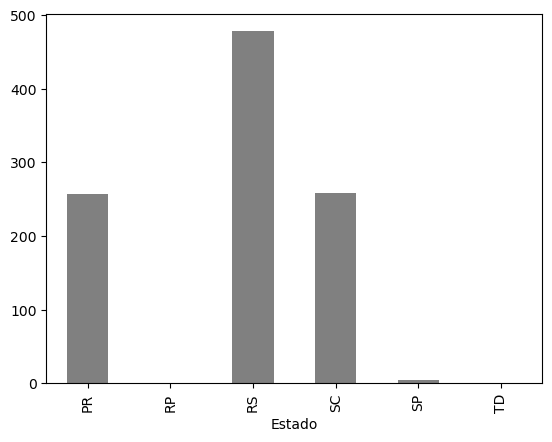

In [11]:
#utilizar grafico de barras para visualizar os dados
agrupar.plot.bar(color = "gray")

In [12]:
#genero

agrupado = dataset.groupby(["Genero"]).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<Axes: xlabel='Genero'>

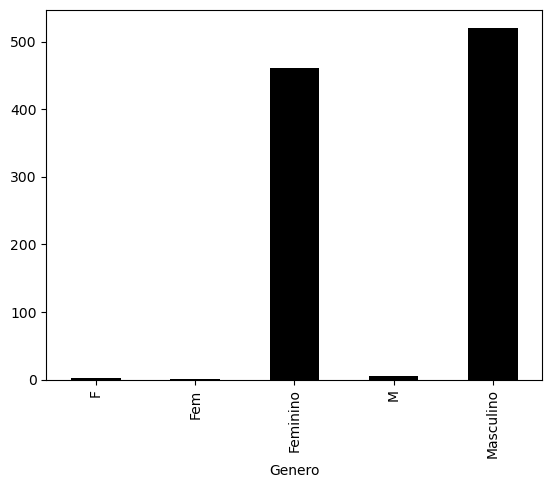

In [13]:
agrupado.plot.bar(color = "black")

In [14]:
#Agora vamos começar a explorar colunas numéricas
#Score
dataset["Score"].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

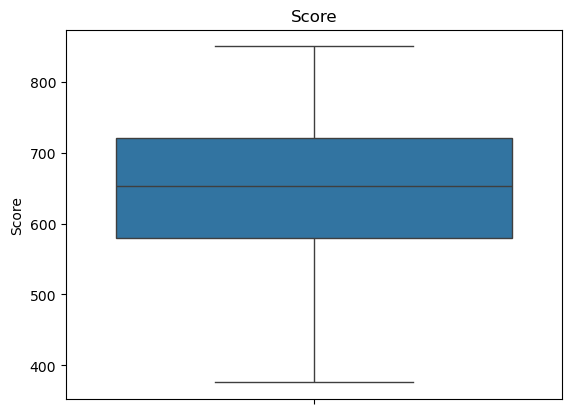

In [15]:
#vizualização e boxplot

srn.boxplot(dataset["Score"]).set_title("Score")

Text(0.5, 1.0, 'Score')

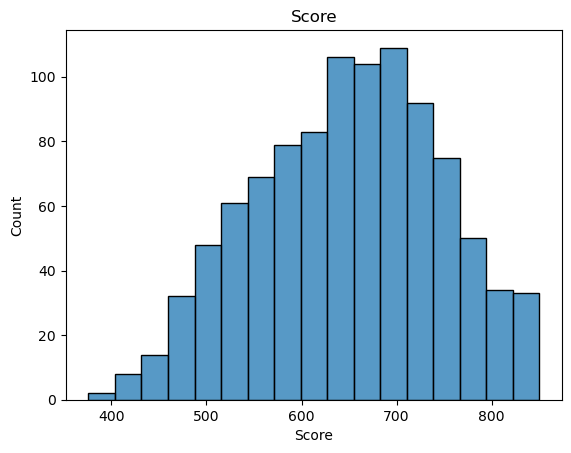

In [16]:
#visualização pelo Histograma
srn.histplot(dataset["Score"]).set_title("Score")

In [17]:
#idade
dataset["Idade"].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

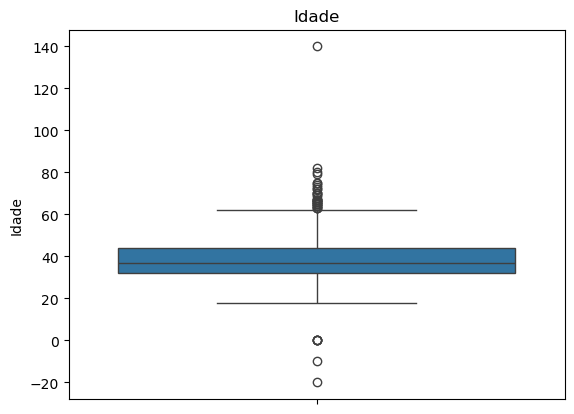

In [18]:
srn.boxplot(dataset["Idade"]).set_title("Idade")

Text(0.5, 1.0, 'Idade')

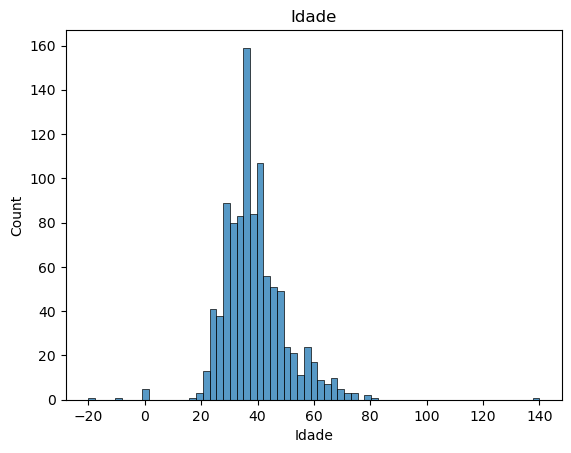

In [19]:
srn.histplot(dataset["Idade"]).set_title("Idade")

In [20]:
#Saldo
dataset["Saldo"].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Saldo')

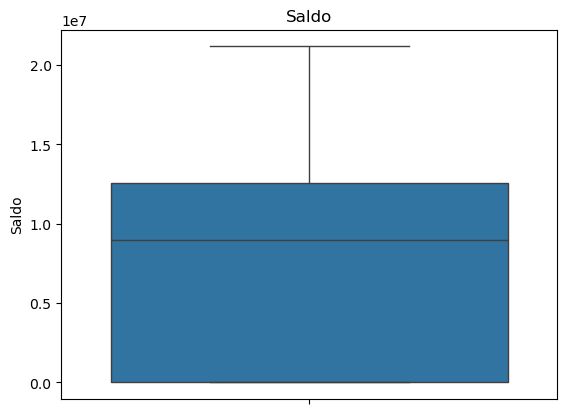

In [21]:
srn.boxplot(dataset["Saldo"]).set_title("Saldo")

Text(0.5, 1.0, 'Saldo')

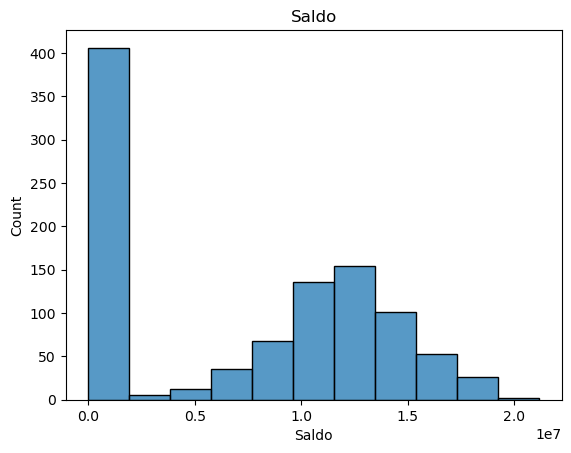

In [23]:
srn.histplot(dataset["Saldo"]).set_title("Saldo")

In [24]:
dataset["Salario"].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

Text(0.5, 1.0, 'Salario')

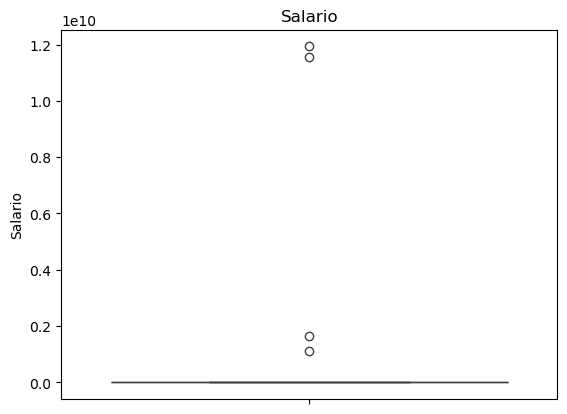

In [25]:
srn.boxplot(dataset["Salario"]).set_title("Salario")

Text(0.5, 1.0, 'Salario')

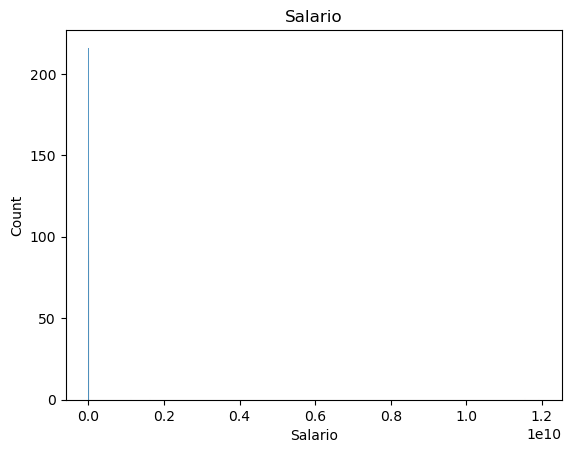

In [26]:
srn.histplot(dataset["Salario"]).set_title("Salario")

In [27]:
#Agora vamos verificar se existe dados nulos em nosso dataset

dataset.isnull().sum()

id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produto           0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

In [29]:
"""
Análise exploratória finalizada, agora iremos fazer um breve relatório:

Referente aos dados categoricos:
    !#Estado
        Encontramos algumas discrepancias
        predominantemente temos os estados  PR, RS e SC sendo todos zona sul do Brasil
        Porem encontramos alguns poucos registros realizados em RP, SP e TD os quais podemos considerar como divergências.
    !#Genero
        Temos problemas com alguns erros de registros incorretos, os quais se referem a mesma coisa porem foram registrados de forma diferente, onde podemos agrupalos.

Referente aos dados Numéricos:
    #Score  
        Até o momento essa coluna não apresentou problemas tendo seus gráficos de histograma e boxplot uniformes e coerentes bem como suas médias e medianas
    !#Idade
        Encontramos discrepância em idade máxima e mínima onde temos idades negativas e idades acima de 110 anos, podemos notar que não são muitos casos, pois o boxspot mostrou poucos outliers.
    #Saldo
        Não tivemos problemas com o saldo mesmo, suas medias batem, sem problemas e apesar do grande número de saldo zerado, isso não é algo que foge da regra de negocio.
    !#Salario
        Não tivemos problemas porem, algumas discrepâncias mesmo que reais não é bom deixalas pois os modelos de análise podem não lidar muito bem com elas nos trazendo informações erronias.


!Dados nulos:

Encontramos duas colunas com dados nulos são elas coluna "Salario" e coluna "Genero" as quais devemos tratar antes de fazer qualquer tipo de análise. 

"""

'\nAnálise exploratória finalizada, agora iremos fazer um breve relatório:\n\nReferente aos dados categoricos:\n    #Estado\n        Encontramos algumas discrepancias\n        predominantemente temos os estados  PR, RS e SC sendo todos zona sul do Brasil\n        Porem encontramos alguns poucos registros realizados em RP, SP e TD os quais podemos considerar como divergências.\n    #Genero\n        Temos problemas com alguns erros de registros incorretos, os quais se referem a mesma coisa porem foram registrados de forma diferente, onde podemos agrupalos.\n\nReferente aos dados Numéricos:\n    #Score  \n        Até o momento essa coluna não apresentou problemas tendo seus gráficos de histograma e boxplot uniformes e coerentes bem como suas médias e medianas\n    #Idade\n        Encontramos discrepância em idade máxima e mínima onde temos idades negativas e idades acima de 110 anos, podemos notar que não são muitos casos, pois o boxspot mostrou poucos outliers.\n    #Saldo\n        Não t

In [30]:
#Tratamento dos dados

In [31]:
#Salario, remover NULLs e substituir pela mediana
dataset["Salario"].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [33]:
mediana = sts.median(dataset["Salario"])
mediana

70518.0

In [34]:
#Substituir NULLs por mediana
dataset["Salario"].fillna(mediana, inplace=True)

C:\Users\deiner.souza\AppData\Local\Temp\ipykernel_11208\44087449.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Salario"].fillna(mediana, inplace=True)


In [36]:
dataset.isnull().sum()

id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produto           0
TemCartCredito    0
Ativo             0
Salario           0
Saiu              0
dtype: int64

In [37]:
# Genero
# problema 1: Valores nulos
# problema 2: consolidar os dados em feminino e masculino

In [41]:
#primeiro vamos visualizar novamente
agrupar = dataset.groupby(["Genero"]).size()
agrupar

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [43]:
# Olhar quantos NULLs existem
dataset["Genero"].isnull().sum()

np.int64(8)

In [45]:
#para tratar aquestão dos nulos seguiremos o conseito técnico de moda
dataset["Genero"].fillna("Masculino", inplace=True)

In [47]:
#verificar novamente
dataset["Genero"].isnull().sum()

np.int64(0)

In [49]:
#Padronizar de acordo com o domínio
dataset.loc[dataset["Genero"] == "M","Genero"] = "Masculino"
dataset.loc[dataset["Genero"].isin(["Fem","F"]), "Genero"] = "Feminino"
#visualizar
agrupar = dataset.groupby(["Genero"]).size()
agrupar